<p style="font-family: Arial; font-size:3em;color:black;"> Session 4 - Lab Exercise 7</p>

In [2]:
# you can download the original Kyphosis dataset from kaggle at https://www.kaggle.com/abbasit/kyphosis-dataset?select=kyphosis.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Kyphosis_df = pd.read_csv('kyphosis.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = Kyphosis_df.drop('Kyphosis',axis=1)
y = Kyphosis_df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# selecting the right "parameters/hyperparameters of ML models can significantly affect their performacnce".
# let's begin exploring those parameters more for a DT model.
'''
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
'''
# Let's consider these three parameters: criterion, splitter, min_samples_split
    # for parameters consider two cases 'gini' and 'entropy'
    # for splitter consider two cases 'best' and 'random'
    # for min_samples_split consider two cases 2 and 5
    # explain and discuss your findings

"\nDecisionTreeClassifier(\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    min_impurity_split=None,\n    class_weight=None,\n    presort=False,\n)\n"

In [110]:
clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
)

In [111]:
X_train

,Age,Number,Start
5,1,2,16
6,61,2,17
71,127,4,12
29,151,2,16
38,20,6,9
50,68,5,10
72,87,4,16
11,148,3,16
48,121,3,3
26,8,3,6


In [112]:
clf = clf.fit(X_train, y_train)

In [113]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [114]:
predictions = clf.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8

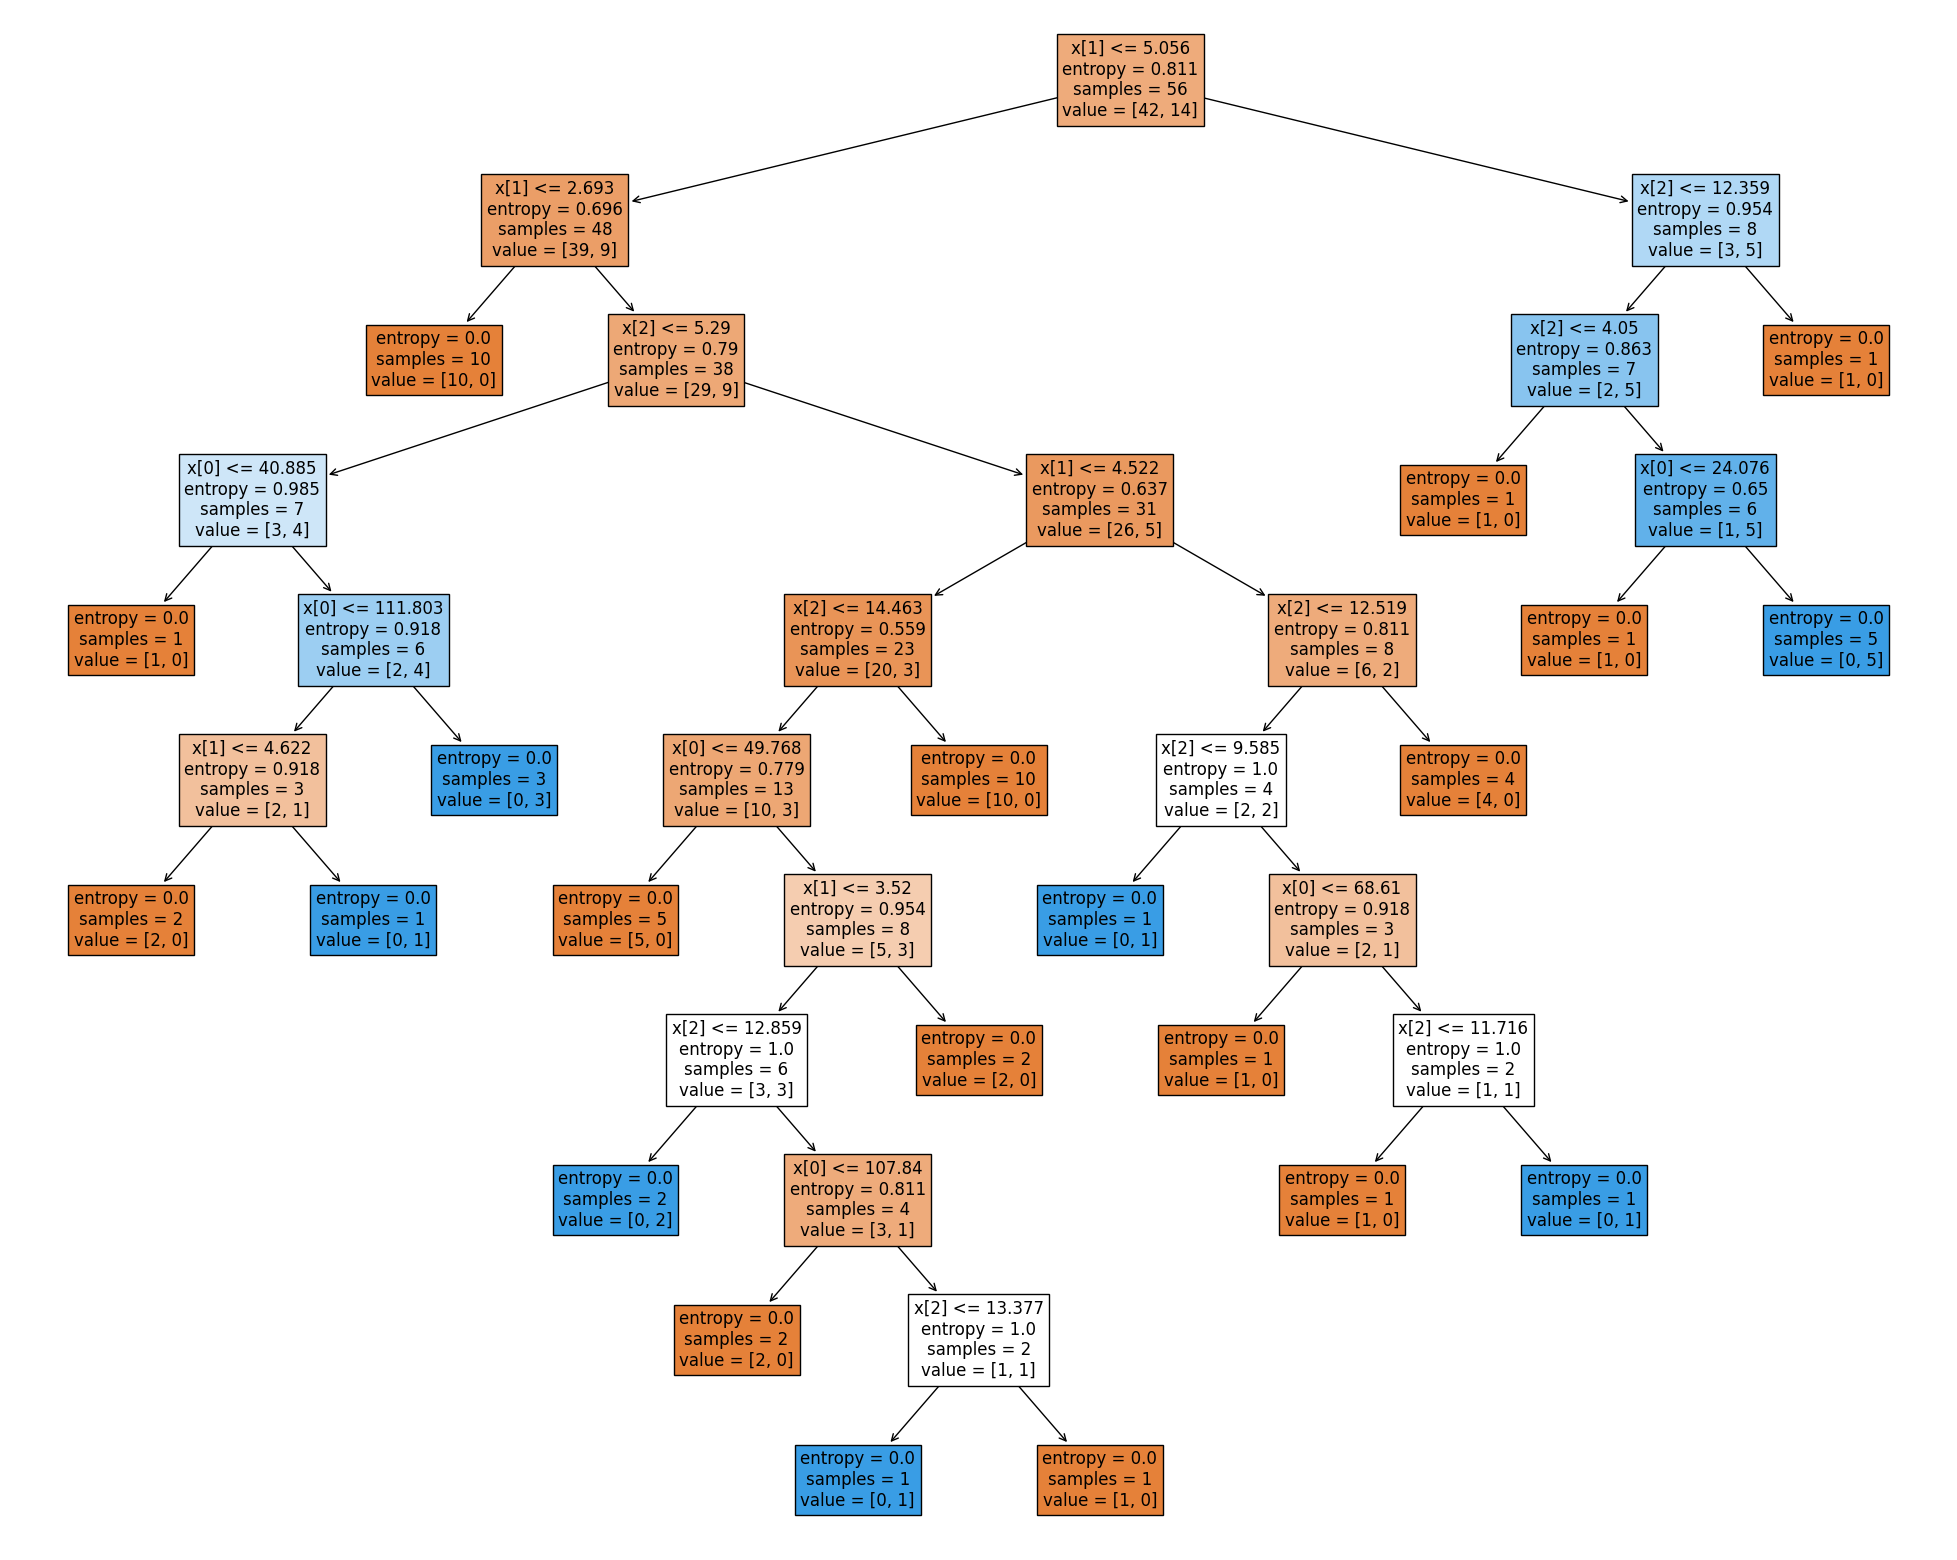

In [65]:
from sklearn import tree 
from matplotlib import pyplot as pyplot

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree( clf,
                filled=True,
                fontsize=12)